In [70]:
import dgl
import dgl.function as fn
import torch
import torch.nn as nn
import torch.nn.functional as F
from dgl import DGLGraph
from torch.utils.data import Dataset, DataLoader
import glob
import json
from tqdm.notebook import tqdm
import torch.optim as optim
import numpy as np
import networkx as nx

## Homework 4 - Generative Models of graphs

first lets introduce our dataset, the "flower graphs" dataset


In [98]:
class CustomDataset(Dataset):
    def __init__(self, path):
        

        filelist = glob.glob(path+'/*.json')
        
        self.graphs = []
        for fname in tqdm(filelist):
            with open(fname) as jfile:
                graph = nx.node_link_graph(json.load(jfile))
                g = dgl.DGLGraph()
                g.from_networkx(graph)
                
                self.graphs.append(g)
        
        
    def __len__(self):
       
        return len(self.graphs)


    def __getitem__(self, idx):
        
    
        return self.graphs[idx]

In [108]:
graph_ds = CustomDataset('/Users/jshlomi/Desktop/Datasets/flower_graphs/')

Its a pretty simple dataset, just an "inner circle" plus some short arms,
no node features or edge features

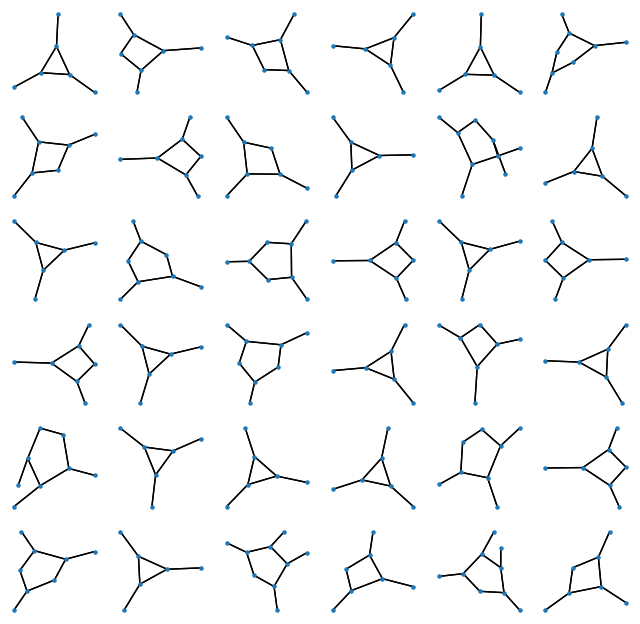

In [109]:
N = 6

fig,ax = plt.subplots(N,N,figsize=(8,8),dpi=100)


idxs = np.random.permutation(np.arange(len(graph_ds)))

for i in range(N):
    for j in range(N):
        idx = idxs[i*N+j]
        nx.draw( graph_ds[idx].to_networkx() ,ax=ax[i][j],node_size=5,arrows=False)

plt.show()

## your goal is to train a network that will generate graphs like these

based on what you saw in the lecture - you need to turn the graph into a sequence of "actions"

the tutorial we are following
https://docs.dgl.ai/en/0.4.x/tutorials/models/3_generative_model/5_dgmg.html

uses a sequence of integers, that represent different things based on where we are in the sequence

the function below converts a graph to a sequence in the right format

In [100]:
def get_decision_sequence(g):
    
    nodes = np.random.permutation( g.nodes() )
    
    edge_start, edge_end = g.edges()
    
    elist = np.random.permutation([(es,ee) for es,ee in zip(edge_start, edge_end)])
    
    added_nodes = []
    added_edges = []
    
    decision_sequence = []

    for node_idx in nodes:
        decision_sequence.append(0)  # Add node
        
        added_nodes.append(node_idx)
        
        edges_from_node = [e for e in elist if e[0]==node_idx]
        
        for e in edges_from_node:
            
            if e[1] not in added_nodes:
                continue
            elif (e[1],e[0]) in added_edges:
                continue
            decision_sequence.append(0)  # Add edge
            dst = np.where(added_nodes==e[1])[0][0]
            decision_sequence.append(dst)  # Set destination to be previous node.
            added_edges.append((e[0],e[1]))
            
        decision_sequence.append(1)  # Stop adding edge
    decision_sequence.append(1)  # Stop adding node

    return decision_sequence


In [82]:
get_decision_sequence( graph_ds[5] )

[0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 3,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 5,
 0,
 6,
 1,
 1]

## after you copy-paste all the following code:

In [ ]:
class DGMGSkeleton(nn.Module):
    
def forward_inference(self):
    
def forward_train(self, actions):
    
class GraphEmbed(nn.Module):
    
class GraphProp(nn.Module):
    
def bernoulli_action_log_prob(logit, action):
    
class AddNode(nn.Module):
    
class AddEdge(nn.Module):

class ChooseDestAndUpdate(nn.Module):
    
class DGMG(DGMGSkeleton):

## you can now create a model that generates graphs

In [85]:
model = DGMG(v_max=10, node_hidden_size=10, num_prop_rounds=5)

## depending on the model being in training or evaluation mode, it will either generate a model, or evaluate the likelihood given a sequence of steps

In [87]:
model.eval();

<ipython-input-84-aa30a9485752>:205: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  self.node_type_embed(torch.LongTensor([node_type])),


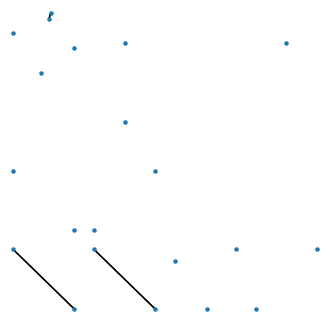

In [89]:
N = 4

fig,ax = plt.subplots(N,N,figsize=(4,4),dpi=100)




for i in range(N):
    for j in range(N):
        
        nx.draw( model().to_networkx() ,ax=ax[i][j],node_size=5,arrows=False)

plt.show()

In [102]:
model.train();

In [103]:
actions = get_decision_sequence(graph_ds[5])

In [106]:
model(actions=actions)

tensor(-8.8838, grad_fn=<AddBackward0>)

In [ ]:
model.train()

for epoch in range( ... ):
        
    for data in tqdm( graph_dataset ):
        

        ...
        
        
        

## submit the trained model source code + saved state_dict 

<ipython-input-84-aa30a9485752>:205: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  self.node_type_embed(torch.LongTensor([node_type])),


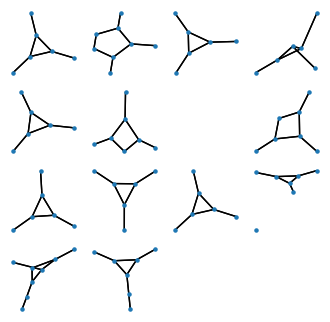

In [97]:
N = 4
model.eval()
fig,ax = plt.subplots(N,N,figsize=(4,4),dpi=100)


for i in range(N):
    for j in range(N):
        
        nx.draw( model().to_networkx() ,ax=ax[i][j],node_size=5,arrows=False)

plt.show()